In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import bbknn
#import scrublet as scr
import bbknn
from collections import Counter
import os
import bbknn
import scipy as scipy

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis')
sc.logging.print_versions()


-----
anndata     0.7.5
scanpy      1.7.1
sinfo       0.3.1
-----
PIL                 8.1.2
anndata             0.7.5
annoy               NA
anyio               NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bbknn               NA
brotli              NA
cairo               1.20.0
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.03.1
dateutil            2.8.1
decorator           4.4.2
fsspec              0.8.7
get_version         2.1
google              NA
h5py                3.1.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.4.1
jupyterlab_server   2.3.0
kiwiso

In [3]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


In [30]:
# The 5 locations lung data file with ACE2 and TMPRSS2 genes is available to download here:
# https://drive.google.com/file/d/17fE9i8xczH-HYPRGD0Y_jv1LPr-sG7JL/view?usp=sharing

# File name "lung_5loc_Madissoon_ACE2_TMPRSS2.h5ad"


In [ ]:
adata=sc.read('lung_5loc_Madissoon_ACE2_TMPRSS2.h5ad')

In [39]:
adata.obs.Celltypes_int.cat.categories

Index(['AT1', 'AT2', 'B_mature', 'B_naive', 'B_plasma', 'B_plasmablast',
       'Basal', 'CD4', 'CD4_TRM', 'CD4_naive/CM', 'CD8', 'CD8_CTL',
       'CD8_GZMK+', 'CD8_TRM', 'Chondrocyte', 'Ciliated', 'DC_1', 'DC_2',
       'DC_activated', 'DC_plasmacytoid', 'Deuterosomal', 'Dividing_AT2',
       'Dividing_Basal', 'Endothelia_Lymphatic', 'Endothelia_vascular_Cap_a',
       'Endothelia_vascular_Cap_g', 'Endothelia_vascular_arterial_pulmonary',
       'Endothelia_vascular_arterial_systemic',
       'Endothelia_vascular_venous_pulmonary',
       'Endothelia_vascular_venous_systemic', 'Erythrocyte', 'Fibro_ASPN',
       'Fibro_adventitial', 'Fibro_adventitial_CCL', 'Fibro_alveolar',
       'Fibro_peribronchial', 'Fibro_perichondrial', 'ILC', 'Ionocyte_n_Brush',
       'MAIT', 'Macro_CHIT1', 'Macro_CXCL10', 'Macro_MARCOneg_FCGBP_Trachea',
       'Macro_MARCOpos_Metallothioneins', 'Macro_alv', 'Macro_dividing',
       'Macro_int', 'Macro_int_CCL', 'Mast_cell', 'Megakaryocyte',
       'Mesothel

In [40]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


In [41]:
#Epithelial cell types: 
epi=['AT1', 'AT2', 'Secretory_Club', 'Basal',  'Suprabasal', 'Ciliated', 'Secretory_Goblet']
adata_tmp=adata[[i in epi for i in adata.obs['Celltypes_int']]]


Trying to set attribute `.uns` of view, copying.


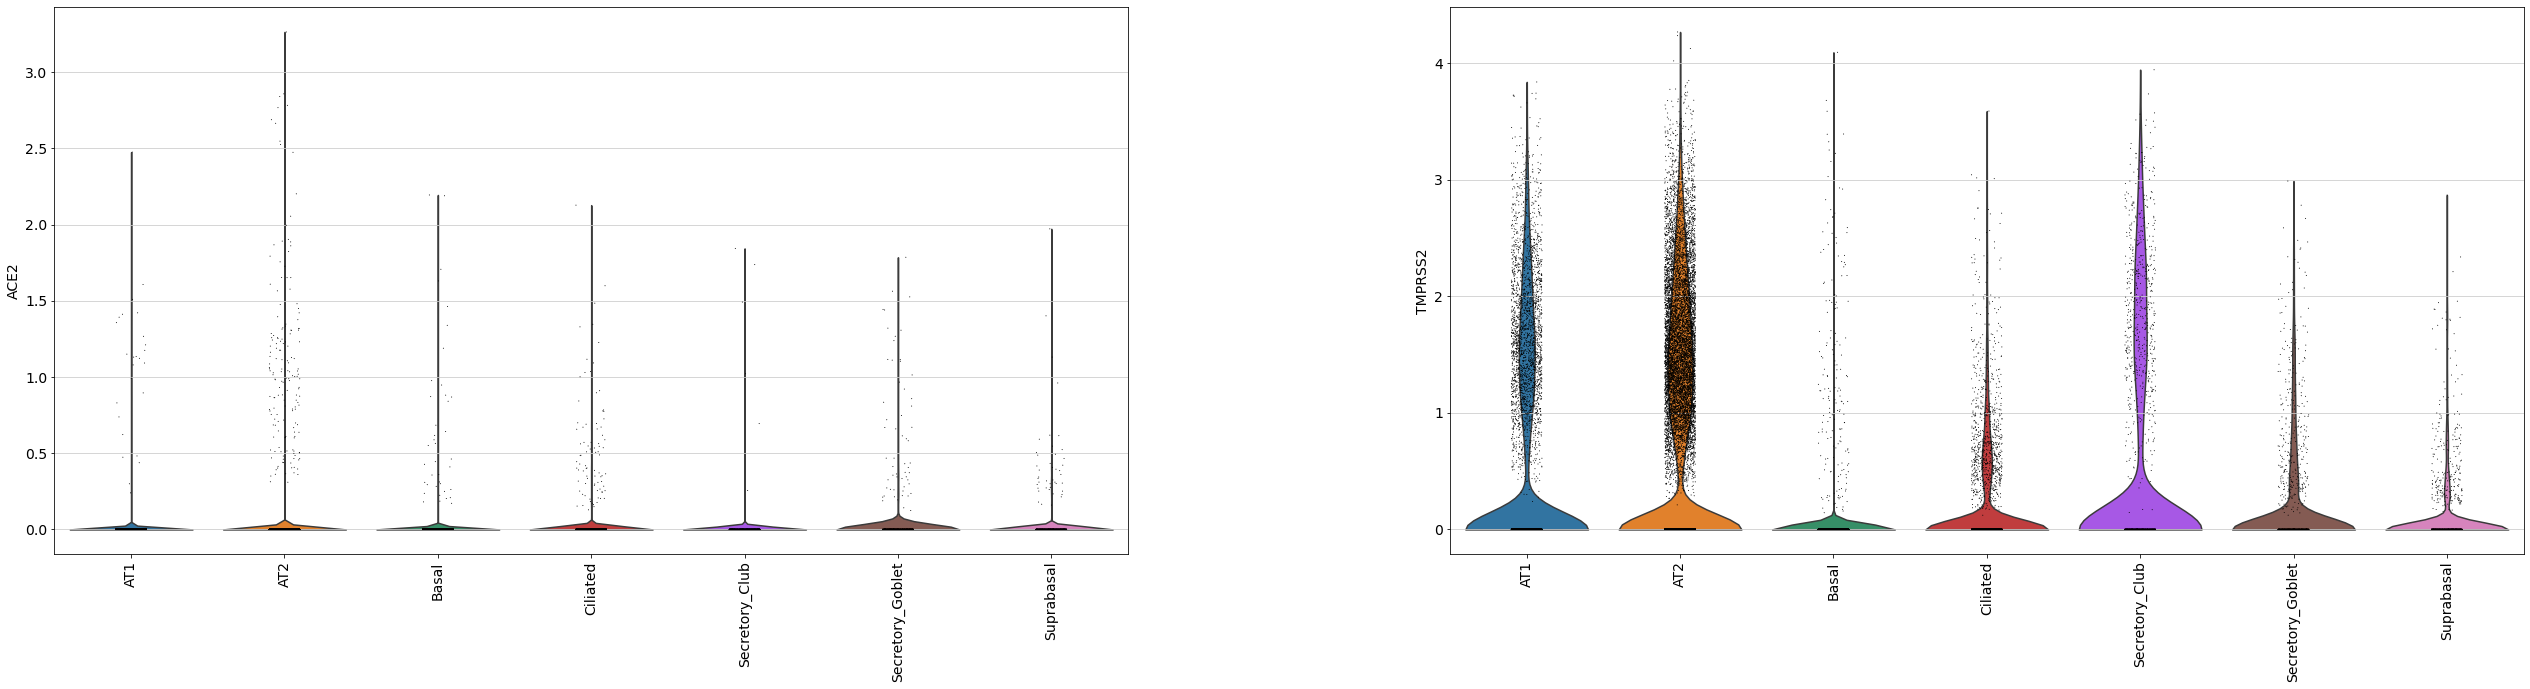

In [42]:
#Plot all locations together
sc.pl.violin(adata_tmp, [ "ACE2", "TMPRSS2", ], groupby="Celltypes_int", rotation=90, size=1)

In [18]:
#Plot only Trachea
adata_tmp_1=adata_tmp[[i in ['a_Trachea',] for i in adata_tmp.obs['Loc_true']]]
sc.pl.violin(adata_tmp_1, [ "ACE2", "TMPRSS2", ], groupby="Celltypes_int", rotation=90, size=1)


In [20]:
#Plot Bronchi (with surrounding parenchyma)
adata_tmp_1=adata_tmp[[i in ['b_Bronchi.2.3', 'c_Bronchi.4'] for i in adata_tmp.obs['Loc_true']]]
sc.pl.violin(adata_tmp_1, [ "ACE2", "TMPRSS2", ], groupby="Celltypes_int", rotation=90, size=1)


In [21]:
#Plot parenchyma
adata_tmp_1=adata_tmp[[i in ['d_LowLeftPar', 'e_TopLeftPar'] for i in adata_tmp.obs['Loc_true']]]
sc.pl.violin(adata_tmp_1, [ "ACE2", "TMPRSS2", ], groupby="Celltypes_int", rotation=90, size=1)
